# Reinforcement Learning - Dynamic Programming
If you want to test/submit your solution **restart the kernel, run all cells and submit the dp_autograde.py file into codegrade.**

In [1]:
# This cell imports %%execwritefile command (executes cell and writes it into file). 
# All cells that start with %%execwritefile should be in dp_autograde.py file after running all cells.
from custommagics import CustomMagics
get_ipython().register_magics(CustomMagics)

In [2]:
%%execwritefile dp_autograde.py
import numpy as np
from collections import defaultdict

Overwriting dp_autograde.py


In [3]:
import matplotlib.pyplot as plt
import sys

%matplotlib inline

assert sys.version_info[:3] >= (3, 6, 0), "Make sure you have Python 3.6 installed!"

## 1. Policy Evaluation (1 point)
In this exercise we will evaluate a policy, e.g. find the value function of a policy. The problem we consider is the gridworld from Example 4.1 in the book. The environment is implemented as `GridworldEnv`, which is a subclass of the `Env` class from [OpenAI Gym](https://github.com/openai/gym). This means that we can interact with the environment. We can look at the documentation to see how we can interact with the environment.

In [4]:
from gridworld import GridworldEnv
env = GridworldEnv()
# Lets see what this is
?env

In [5]:
# To have a quick look into the code
??env

Now we want to evaluate a policy by using Dynamic Programming. For more information, see the [Intro to RL](https://drive.google.com/open?id=1opPSz5AZ_kVa1uWOdOiveNiBFiEOHjkG) book, section 4.1. This algorithm requires knowledge of the problem dynamics in the form of the transition probabilities $p(s',r|s,a)$. In general these are not available, but for our gridworld we know the dynamics and these can be accessed as `env.P`. Note that we do not need to use a discount_factor for episodic tasks but make sure your implementation can handle this correctly!

In [6]:
# Take a moment to figure out what P represents. 
# Note that this is a deterministic environment. 
# What would a stochastic environment look like?
env.P

{0: {0: [(1.0, 0, 0.0, True)],
  1: [(1.0, 0, 0.0, True)],
  2: [(1.0, 0, 0.0, True)],
  3: [(1.0, 0, 0.0, True)]},
 1: {0: [(1.0, 1, -1.0, False)],
  1: [(1.0, 2, -1.0, False)],
  2: [(1.0, 5, -1.0, False)],
  3: [(1.0, 0, -1.0, True)]},
 2: {0: [(1.0, 2, -1.0, False)],
  1: [(1.0, 3, -1.0, False)],
  2: [(1.0, 6, -1.0, False)],
  3: [(1.0, 1, -1.0, False)]},
 3: {0: [(1.0, 3, -1.0, False)],
  1: [(1.0, 3, -1.0, False)],
  2: [(1.0, 7, -1.0, False)],
  3: [(1.0, 2, -1.0, False)]},
 4: {0: [(1.0, 0, -1.0, True)],
  1: [(1.0, 5, -1.0, False)],
  2: [(1.0, 8, -1.0, False)],
  3: [(1.0, 4, -1.0, False)]},
 5: {0: [(1.0, 1, -1.0, False)],
  1: [(1.0, 6, -1.0, False)],
  2: [(1.0, 9, -1.0, False)],
  3: [(1.0, 4, -1.0, False)]},
 6: {0: [(1.0, 2, -1.0, False)],
  1: [(1.0, 7, -1.0, False)],
  2: [(1.0, 10, -1.0, False)],
  3: [(1.0, 5, -1.0, False)]},
 7: {0: [(1.0, 3, -1.0, False)],
  1: [(1.0, 7, -1.0, False)],
  2: [(1.0, 11, -1.0, False)],
  3: [(1.0, 6, -1.0, False)]},
 8: {0: [(1.0, 4

In [7]:
%%execwritefile -a dp_autograde.py

def policy_eval_v(policy, env, discount_factor=1.0, theta=0.00001):
    """
    Evaluate a policy given an environment and a full description of the environment's dynamics.
    
    Args:
        policy: [S, A] shaped matrix representing the policy.
        env: OpenAI env. env.P represents the transition probabilities of the environment.
            env.P[s][a] is a list of transition tuples (prob, next_state, reward, done).
            env.nS is a number of states in the environment. 
            env.nA is a number of actions in the environment.
        theta: We stop evaluation once our value function change is less than theta for all states.
        discount_factor: Gamma discount factor.
    
    Returns:
        Vector of length env.nS representing the value function.
    """
    # Start with an all 0 value function
    V = np.zeros(env.nS)
    
    # Outer loop loops while accuracy of estimation (i.e., function change) exceeds threshold theta for all states
    while True:
        
        # set function change to zero so it gets updated for a small change
        function_change = 0.0
        
        # Inner loop loops over each state (excluding the terminal states)
        for s in range(env.nS):
            
            # save current state-values
            v = V[s]
            
            # get lists of transition probabilities, successive states, and corresponding rewards for all actions
            probs = [env.P[s][a][0][0] for a in range(env.nA)]
            next_states = [env.P[s][a][0][1] for a in range(env.nA)]
            rewards = [env.P[s][a][0][2] for a in range(env.nA)]
            
            # Policiy evaluation update step ( based on equation 4.5)
            V[s] = np.sum(policy[s] * (probs * (rewards + discount_factor * V[next_states])))
            
            # Update function change
            function_change = np.maximum(function_change, abs(v - V[s]))
            
        # Converged if function change is smaller than theta for all states
        if function_change < theta:
            break
    
    return np.array(V)

Appending to dp_autograde.py


In [8]:
# Let's run your code, does it make sense?
random_policy = np.ones([env.nS, env.nA]) / env.nA
print(random_policy)
V = policy_eval_v(random_policy, env)
assert V.shape == (env.nS)
V

[[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]


array([  0.        , -13.99993529, -19.99990698, -21.99989761,
       -13.99993529, -17.9999206 , -19.99991379, -19.99991477,
       -19.99990698, -19.99991379, -17.99992725, -13.99994569,
       -21.99989761, -19.99991477, -13.99994569,   0.        ])

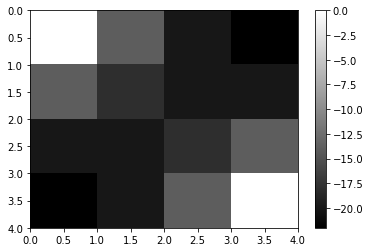

In [9]:
def plot_gridworld_value(V):
    plt.figure()
    c = plt.pcolormesh(V, cmap='gray')
    plt.colorbar(c)
    plt.gca().invert_yaxis()  # In the array, first row = 0 is on top

# Making a plot always helps
plot_gridworld_value(V.reshape(env.shape))

---
## 2. Policy Iteration (2 points)
Using the policy evaluation algorithm we can implement policy iteration to find a good policy for this problem. Note that we do not need to use a discount_factor for episodic tasks but make sure your implementation can handle this correctly!

In [10]:
%%execwritefile -a dp_autograde.py
# Added by Lennert:
import pdb
from copy import deepcopy

def policy_iter_v(env, policy_eval_v=policy_eval_v, discount_factor=1.0):
    """
    Policy Iteration Algorithm. Iteratively evaluates and improves a policy
    until an optimal policy is found.
    
    Args:
        env: The OpenAI envrionment.
        policy_eval_v: Policy Evaluation function that takes 3 arguments:
            policy, env, discount_factor.
        discount_factor: gamma discount factor.
        
    Returns:
        A tuple (policy, V). 
        policy is the optimal policy, a matrix of shape [S, A] where each state s
        contains a valid probability distribution over actions.
        V is the value function for the optimal policy.
        
    """
    # Start with a random policy
    policy = np.ones([env.nS, env.nA]) / env.nA
    
    
    # Start with V all zeros
    V = np.zeros((env.nS))
    
    while True:
        # Should consist of two steps:
        # 1. Policy evaluation
        V = policy_eval_v(policy, env, discount_factor)
        
        # 2 - policy improvement step
        # iterate over each step
        policy_old = deepcopy(policy)
        policy_stable = True
        for s in range(env.nS):
            
            old_action = deepcopy(policy[s])
            
            # get lists of transition probabilities, successive states, and corresponding rewards for all actions
            probs = [env.P[s][a][0][0] for a in range(env.nA)]
            next_states = [env.P[s][a][0][1] for a in range(env.nA)]
            rewards = [env.P[s][a][0][2] for a in range(env.nA)]
            
            # compute expected returns for current state over all possible actions
            expected_returns = probs * (rewards + discount_factor * V[next_states])
            
            # select action_index corresponding to highest expected return
            max_indices = [idx for idx, val in enumerate(expected_returns) if val == max(expected_returns)]
            
            # break ties randomly
            max_index = np.random.choice(max_indices) 
            
            # update policy
            policy[s] = [1 if index == max_index else 0 for index in range(env.nA)]
            
            # policy is unstable if it changed after update
            if np.argmax(old_action) != np.argmax(policy[s]):
                policy_stable = False
                
        if policy_stable:
            break
                   
    return policy, V

Appending to dp_autograde.py


Policy Probability Distribution:
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]

Reshaped Grid Policy (0=up, 1=right, 2=down, 3=left):
[[2 3 3 2]
 [0 3 0 2]
 [0 0 2 2]
 [1 1 1 3]]
v<<v
^<^v
^^vv
>>><

Value Function:
[ 0. -1. -2. -3. -1. -2. -3. -2. -2. -3. -2. -1. -3. -2. -1.  0.]

Reshaped Grid Value Function:
[[ 0. -1. -2. -3.]
 [-1. -2. -3. -2.]
 [-2. -3. -2. -1.]
 [-3. -2. -1.  0.]]



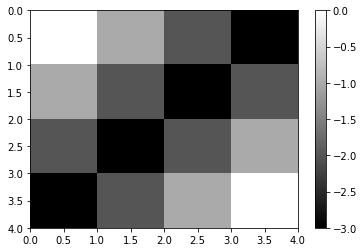

In [11]:
# Let's see what it does
policy, v = policy_iter_v(env, policy_eval_v)
print("Policy Probability Distribution:")
print(policy)
print("")

def print_grid_policy(policy, symbols=["^", ">", "v", "<"]):
    symbols = np.array(symbols)
    for row in policy:
        print("".join(symbols[row]))

print("Reshaped Grid Policy (0=up, 1=right, 2=down, 3=left):")
print(np.reshape(np.argmax(policy, axis=1), env.shape))
print_grid_policy(np.reshape(np.argmax(policy, axis=1), env.shape))
print("")

print("Value Function:")
print(v)
print("")

print("Reshaped Grid Value Function:")
print(v.reshape(env.shape))
print("")

plot_gridworld_value(v.reshape(env.shape))

---
## 3. Q-value Iteration (3 points)
In this exercise you will implement the value iteration algorithm. However, because this algorithm is quite similar to the ones you implemented previously, we will spice things up a bit and use Q-values instead. Thus instead of using Bellman optimality equations for V you will use Bellman equations for Q. 

In [12]:
%%execwritefile -a dp_autograde.py
from copy import deepcopy
import pdb
def value_iter_q(env, theta=0.0001, discount_factor=1.0):
    """
    Q-value Iteration Algorithm.
    
    Args:
        env: OpenAI env. env.P represents the transition probabilities of the environment.
            env.P[s][a] is a list of transition tuples (prob, next_state, reward, done).
            env.nS is a number of states in the environment. 
            env.nA is a number of actions in the environment.
        theta: We stop evaluation once our value function change is less than theta for all state-action pairs.
        discount_factor: Gamma discount factor.
        
    Returns:
        A tuple (policy, Q) of the optimal policy and the optimal Q-value function.        
    """
    
    # Start with an all 0 Q-value function
    Q = np.zeros((env.nS, env.nA))
    
    delta = -1
    policy = np.ones([env.nS, env.nA]) / env.nA
    while (delta>theta or delta < 0):
        old_Q = deepcopy(Q)
        for s in range(env.nS):
            probs = np.array([env.P[s][a][0][0] for a in range(env.nA)])
            next_states = np.array([env.P[s][a][0][1] for a in range(env.nA)])
            rewards = np.array([env.P[s][a][0][2] for a in range(env.nA)])

            # Maximum action-value over actions in the next state
            # This reflects the greedy, deterministic policy that we implement during value iteration:
            # take the action at each step that has the highest action-value
            next_Q = np.array([max(Q[next_state]) for next_state in next_states])
            
            Q[s] = probs * (rewards + discount_factor * next_Q)

            # Based on the following equation:
            # Q[s][a] = "max over a'""sum over s' and r" probs * (rewards + discount_factor * Q[next_states])
            # Sum over s' (next states) and r drops out, as for each action there is a single known 
            # next state and reward. (still weird that the 0 reward only is given when an action is
            # taken from a terminal state)
            # max over a': maximum over actions taken from the next state, included in next_Q
            # probs: probability of each transition to next state
            # rewards: reward of action taken now
            # next_Q: list of (env.nA) that for each entry gives the action-value of the ideal action
            
        delta = np.max(abs(Q-old_Q)) #Find largest difference between new and old Q

    # For this exercise, we should not generate a stochastic policy, but a one-hot deterministic policy.
    # Stochastic policy could be done by taking the softmax of the Q array along dim 1.
    
    policy = np.zeros([env.nS, env.nA])
    for s in range(env.nS):
        action_choice = np.argmax(Q[s,:])
        policy[s,action_choice] = 1
    
    return policy, Q

Appending to dp_autograde.py


In [13]:
# Let's see what it does
policy, Q = value_iter_q(env)
print("Policy Probability Distribution:")
print(policy)
print("")

print("Reshaped Grid Policy (0=up, 1=right, 2=down, 3=left):")
print(np.reshape(np.argmax(policy, axis=1), env.shape))
print_grid_policy(np.reshape(np.argmax(policy, axis=1), env.shape))
print("")

print("Q Function:")
print(Q)
print("")

Policy Probability Distribution:
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

Reshaped Grid Policy (0=up, 1=right, 2=down, 3=left):
[[0 3 3 2]
 [0 0 0 2]
 [0 0 1 2]
 [0 1 1 0]]
^<<v
^^^v
^^>v
^>>^

Q Function:
[[ 0.  0.  0.  0.]
 [-2. -3. -3. -1.]
 [-3. -4. -4. -2.]
 [-4. -4. -3. -3.]
 [-1. -3. -3. -2.]
 [-2. -4. -4. -2.]
 [-3. -3. -3. -3.]
 [-4. -3. -2. -4.]
 [-2. -4. -4. -3.]
 [-3. -3. -3. -3.]
 [-4. -2. -2. -4.]
 [-3. -2. -1. -3.]
 [-3. -3. -4. -4.]
 [-4. -2. -3. -4.]
 [-3. -1. -2. -3.]
 [ 0.  0.  0.  0.]]



In [14]:
# As you can see, the visualization of the Q function is quite clumsy and is not that easy to check 
# that all values make sense. However, you can easily create a V function from Q and policy to double
# check that the values are what you would expect.

If you want to test/submit your solution **restart the kernel, run all cells and submit the dp_autograde.py file into codegrade.**